In [1]:
# Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [2]:
# Load the data from csv
df = pd.read_csv('car.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [4]:
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000


In [5]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [6]:
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors = 'coerce')

In [7]:
df.Horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [8]:
print(df[df['Horsepower'].isna()][['Cylinders', 'Displacement', 'Weight','Acceleration', 'Model Year', 'US Made']])

     Cylinders  Displacement  Weight  Acceleration  Model Year  US Made
32           4          98.0    2046          19.0          71        1
126          6         200.0    2875          17.0          74        1
330          4          85.0    1835          17.3          80        0
336          4         140.0    2905          14.3          80        1
354          4         100.0    2320          15.8          81        0
374          4         151.0    3035          20.5          82        1


In [9]:
# Drop rows where Horsepower is NaN
df = df.dropna(subset=['Horsepower'])

In [10]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,0.625000
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.484742
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000


In [11]:
# relationship visuals

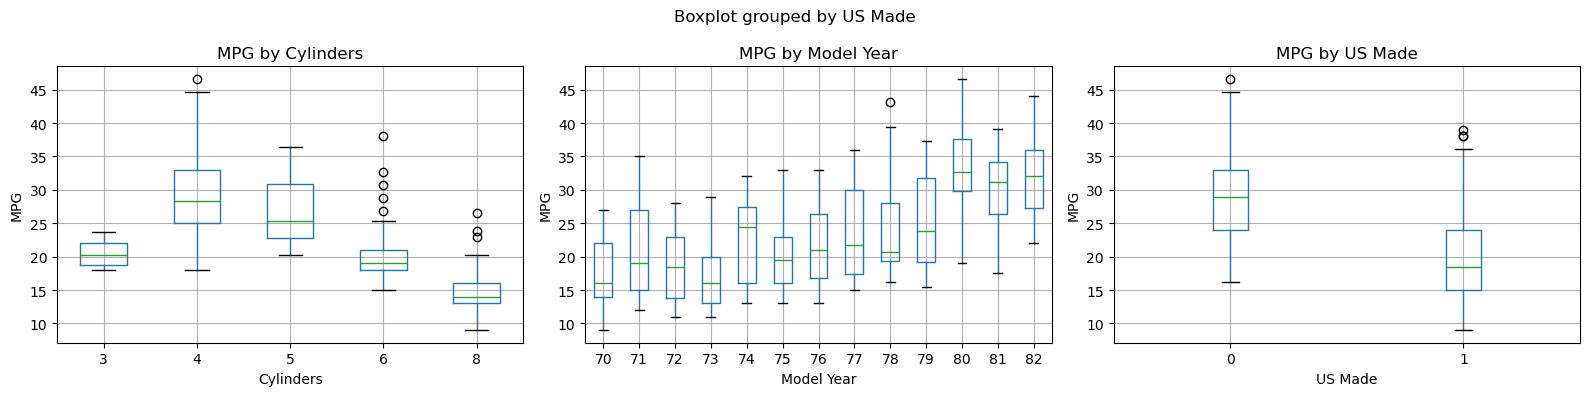

In [12]:
predictors = ['Cylinders', 'Model Year', 'US Made']

fig, axes = plt.subplots(1,3, figsize=(16, 4))
axes = axes.flatten()

for i, var in enumerate(predictors):
    df.boxplot(column='MPG', by=var, ax=axes[i])
    axes[i].set_title(f'MPG by {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('MPG')

plt.tight_layout()
plt.show()

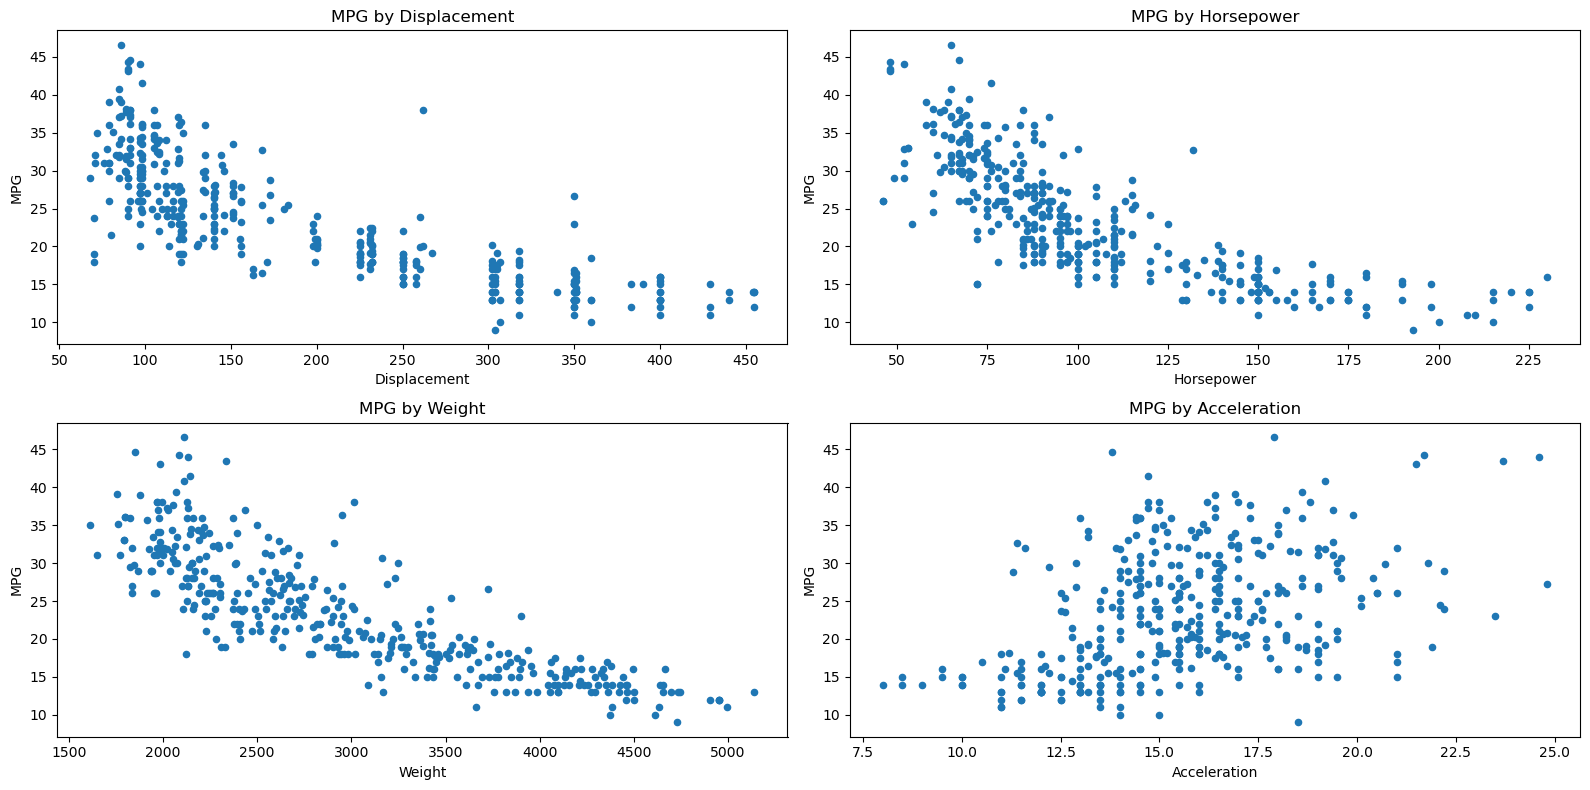

In [13]:
predictors2 = ['Displacement', 'Horsepower', 'Weight', 'Acceleration']

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(predictors2):  
    df.plot.scatter(x=var, y='MPG', ax=axes[i])
    axes[i].set_title(f'MPG by {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('MPG')

plt.tight_layout()
plt.show()

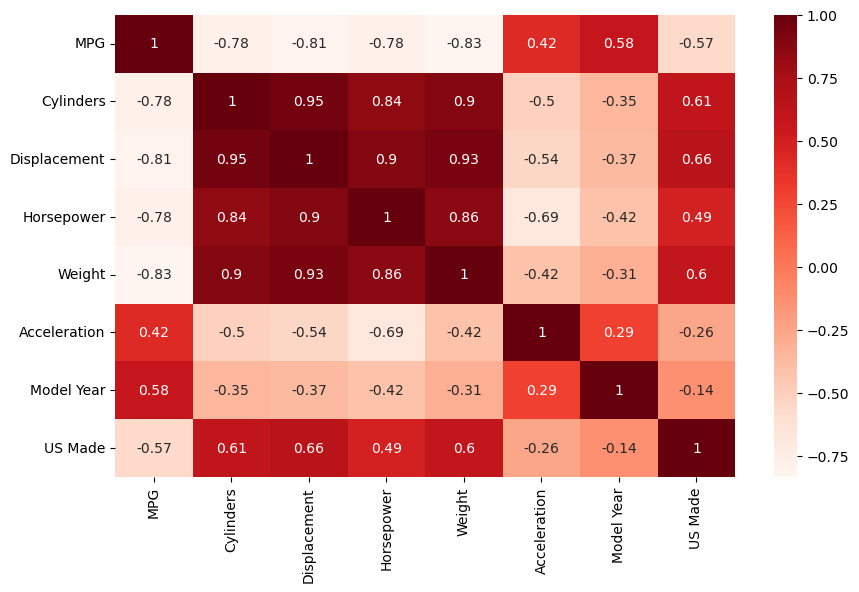

In [14]:
# correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap=plt.cm.Reds,annot=True)
plt.show()

In [15]:
# Calculate VIF for each variable
def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) 
                       for i in range(len(features))]
    return vif_data.sort_values('VIF', ascending=False)

features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 
           'Acceleration', 'Model Year', 'US Made']
print(calculate_vif(df, features))

        Feature         VIF
3        Weight  137.515824
0     Cylinders  116.972922
5    Model Year  111.461535
1  Displacement  101.294390
4  Acceleration   69.462808
2    Horsepower   65.025201
6       US Made    5.211925


In [16]:
# stepwise selection 
def stepwise_selection(X, y, threshold_in=0.05, threshold_out=0.10):
    """
    Perform stepwise feature selection
    """
    # Start with no variables
    included = []
    
    while True:
        changed = False
        
        # Forward step - add variables
        excluded = [col for col in X.columns if col not in included]
        new_pval = pd.Series(index=excluded, dtype=float)
        
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[included + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
            
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            print(f'Added {best_feature} with p-value {best_pval:.4f}')
            
        # Backward step - remove variables
        if len(included) > 0:
            model = sm.OLS(y, sm.add_constant(X[included])).fit()
            pvalues = model.pvalues.iloc[1:]  # Exclude intercept
            worst_pval = pvalues.max()
            
            if worst_pval > threshold_out:
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                changed = True
                print(f'Removed {worst_feature} with p-value {worst_pval:.4f}')
                
        if not changed:
            break
            
    return included

# Use it:
# Prepare your data
X = df[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 
        'Acceleration', 'Model Year', 'US Made']]
y = df['MPG']

# Run stepwise selection
selected_features = stepwise_selection(X, y)
print(f"\nFinal selected features: {selected_features}")

# Fit final model
final_model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
print(final_model.summary())

Added Weight with p-value 0.0000
Added Model Year with p-value 0.0000
Added US Made with p-value 0.0000

Final selected features: ['Weight', 'Model Year', 'US Made']
                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     585.0
Date:                Sat, 31 May 2025   Prob (F-statistic):          1.47e-143
Time:                        14:16:35   Log-Likelihood:                -1026.2
No. Observations:                 392   AIC:                             2060.
Df Residuals:                     388   BIC:                             2076.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t 

In [17]:
# check correleations 
print(df[['Weight', 'Model Year', 'US Made']].corr())

              Weight  Model Year   US Made
Weight      1.000000   -0.309120  0.600978
Model Year -0.309120    1.000000 -0.136065
US Made     0.600978   -0.136065  1.000000


In [18]:
# Calculate VIF for final selected features
final_features = ['Weight', 'Model Year', 'US Made']
vif_final = calculate_vif(df, final_features)
print(vif_final)

      Feature        VIF
0      Weight  18.638401
1  Model Year  12.581913
2     US Made   4.142989


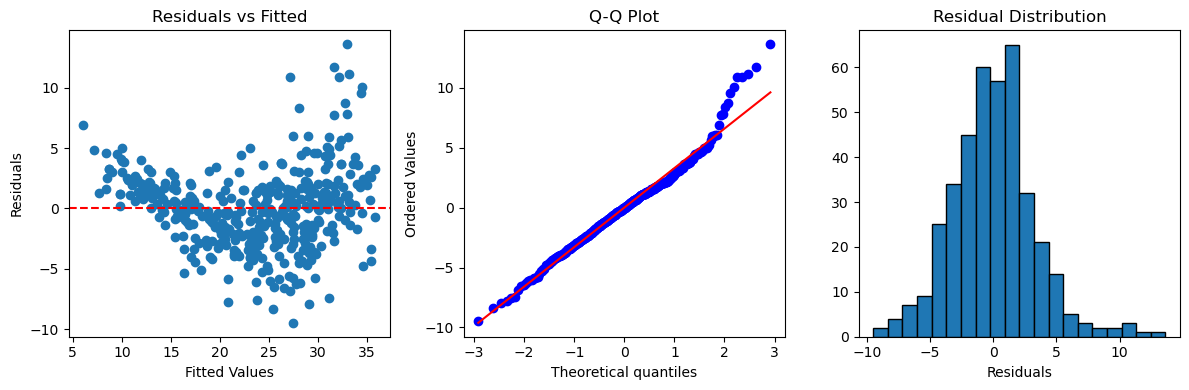

In [19]:
# Check model assumptions
residuals = final_model.resid
fitted = final_model.fittedvalues

# Residual plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(fitted, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(1, 3, 2)
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.subplot(1, 3, 3)
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.title('Residual Distribution')

plt.tight_layout()
plt.show()

In [20]:
# Find cars with large positive residuals
large_residuals = df[residuals > 2.5]  # or whatever threshold
print("Cars with large positive residuals:")
print(large_residuals[['MPG', 'Weight', 'Model Year', 'US Made']])

Cars with large positive residuals:
      MPG  Weight  Model Year  US Made
0    18.0    3504          70        1
2    18.0    3436          70        1
5    15.0    4341          70        1
6    14.0    4354          70        1
7    14.0    4312          70        1
..    ...     ...         ...      ...
383  38.0    1965          82        0
385  38.0    1995          82        0
387  38.0    3015          82        1
391  36.0    2370          82        1
394  44.0    2130          82        0

[69 rows x 4 columns]


In [21]:
X = df[['Weight', 'Model Year', 'US Made']]
y = df['MPG']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape[0]} observations")
print(f"Test set: {X_test.shape[0]} observations")

Training set: 313 observations
Test set: 79 observations


In [22]:
# Fit model on training data only
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict on both sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [24]:
# compare 
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTraining R²: {train_r2:.3f}")
print(f"Test R²: {test_r2:.3f}")
print(f"Training RMSE: {train_rmse:.3f}")
print(f"Test RMSE: {test_rmse:.3f}")


Training R²: 0.825
Test R²: 0.782
Training RMSE: 3.326
Test RMSE: 3.334


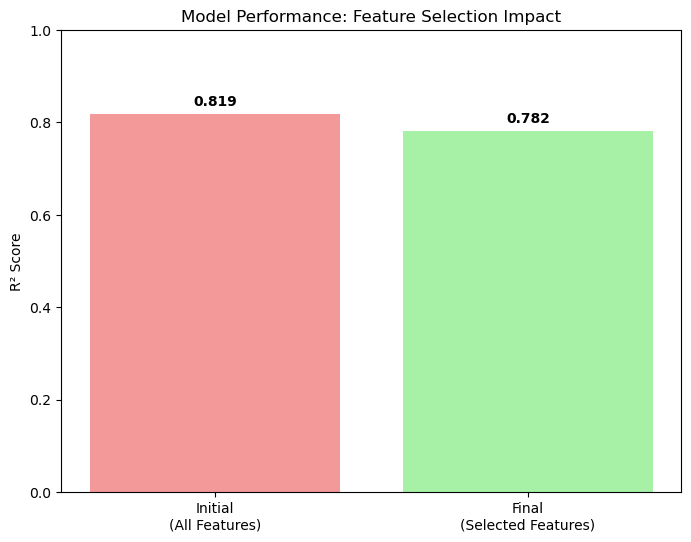

In [25]:
# Model performance comparison
models = ['Initial\n(All Features)', 'Final\n(Selected Features)']
r2_scores = [0.819, 0.782]  # Full dataset vs test performance

plt.figure(figsize=(8, 6))
bars = plt.bar(models, r2_scores, color=['lightcoral', 'lightgreen'], alpha=0.8)
plt.ylabel('R² Score')
plt.title('Model Performance: Feature Selection Impact')
plt.ylim(0, 1)

# Add value labels on bars
for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.show()

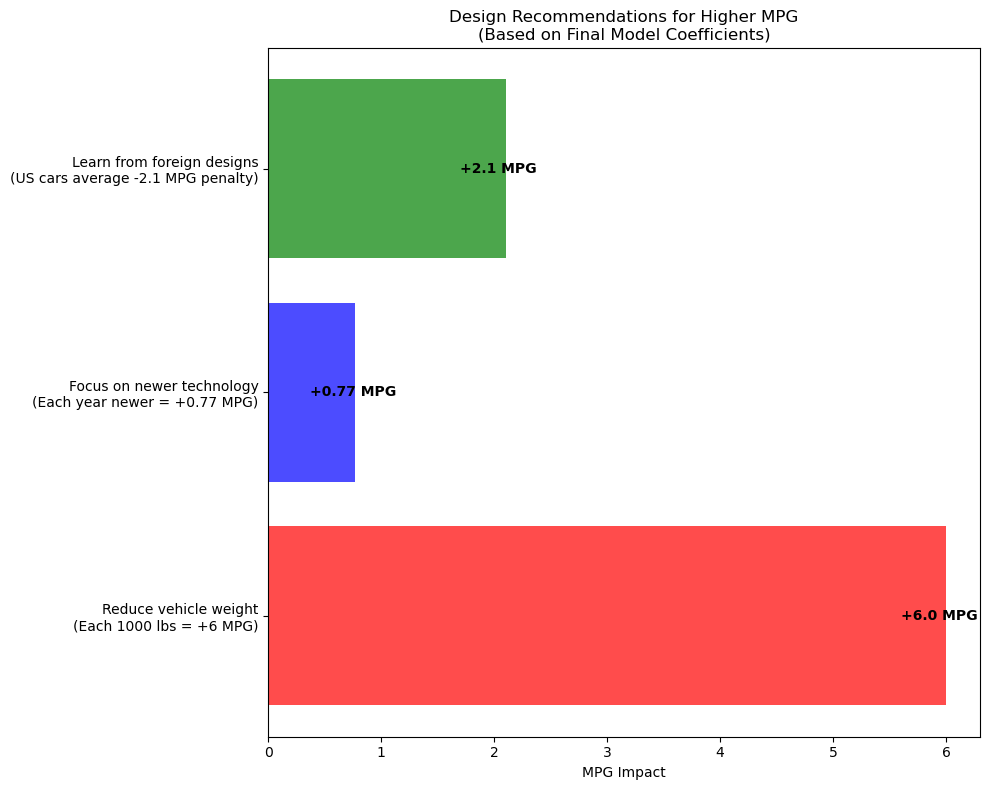

In [26]:
# Actionable insights for car manufacturer
fig, ax = plt.subplots(figsize=(10, 8))

recommendations = [
    "Reduce vehicle weight\n(Each 1000 lbs = +6 MPG)",
    "Focus on newer technology\n(Each year newer = +0.77 MPG)", 
    "Learn from foreign designs\n(US cars average -2.1 MPG penalty)"
]

impact_scores = [6.0, 0.77, 2.1]
colors = ['red', 'blue', 'green']

bars = ax.barh(recommendations, impact_scores, color=colors, alpha=0.7)
ax.set_xlabel('MPG Impact')
ax.set_title('Design Recommendations for Higher MPG\n(Based on Final Model Coefficients)')

# Add value labels
for bar, score in zip(bars, impact_scores):
    ax.text(bar.get_width() + -0.4, bar.get_y() + bar.get_height()/2, 
            f'+{score} MPG', va='center', fontweight='bold')

plt.tight_layout()
plt.show()